In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =  pd.read_csv("sales_data.csv")

In [3]:
df

,Date,Store ID,Product ID,Units Sold,Sales Amount,Discount Applied,Customer Segment
0,10/11/2024,S013,P026,183.0,2934.57,NaN,NaN
1,11-24-2024,S011,P069,200.0,3213.49,8.97,Regular
2,11-18-2024,S049,P042,27.0,4364.95,4.45,Regular
3,11-14-2024,S017,NaN,158.0,4200.93,17.58,New
4,NaN,S044,P027,186.0,715.89,1.15,Regular
...,...,...,...,...,...,...,...
9995,11-24-2024,S001,P065,188.0,1910.23,10.01,New
9996,09/11/2024,S001,P061,120.0,3750.73,13.46,NaN
9997,2024-11-17,S031,P100,159.0,1215.76,12.59,New
9998,2024-11-12,S018,P002,17.0,1496.13,2.87,Regular


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              8958 non-null   object 
 1   Store ID          9498 non-null   object 
 2   Product ID        9505 non-null   object 
 3   Units Sold        9494 non-null   float64
 4   Sales Amount      9466 non-null   float64
 5   Discount Applied  8986 non-null   float64
 6   Customer Segment  9504 non-null   object 
dtypes: float64(3), object(4)
memory usage: 547.0+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Units Sold,9494.0,101.987782,65.953888,1.00,50.000,100.00,150.0000,974.000000
Sales Amount,9466.0,2546.990840,2002.560940,10.34,1252.565,2484.37,3733.9175,48687.103122
Discount Applied,8986.0,9.984010,5.773257,0.00,4.930,10.04,15.0000,20.000000


# Missing Values

In [6]:
df.isnull().sum() #checking for null values

Date                1042
Store ID             502
Product ID           495
Units Sold           506
Sales Amount         534
Discount Applied    1014
Customer Segment     496
dtype: int64

In [7]:
df.duplicated().sum() #checking for duplicate rows

0

# Task 1: Data Cleaning

Step 1.1: Handle date format inconsistencies

In [8]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

/var/folders/h8/6p4k9gpj52g9xjrh452vpgh80000gn/T/ipykernel_6339/2263964175.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


Step 1.2: Handle missing values by filling or dropping them

In [9]:
# Filling missing Customer Segment with mode (most common segment)
df['Customer Segment'].fillna(df['Customer Segment'].mode()[0], inplace=True)

In [10]:
# Dropping rows with missing critical values
df.dropna(subset=['Date', 'Store ID', 'Product ID', 'Units Sold', 'Sales Amount'], inplace=True)

Step 1.3: Detecting and handling outliers in 'Units Sold' and 'Sales Amount'

In [11]:
# Using the IQR method for outlier detection
Q1_units = df['Units Sold'].quantile(0.25)
Q3_units = df['Units Sold'].quantile(0.75)

In [12]:
IQR_units = Q3_units - Q1_units
df = df[(df['Units Sold'] >= Q1_units - 1.5 * IQR_units) & 
                        (df['Units Sold'] <= Q3_units + 1.5 * IQR_units)]


In [13]:
Q1_sales = df['Sales Amount'].quantile(0.25)
Q3_sales = df['Sales Amount'].quantile(0.75)

In [14]:
IQR_sales = Q3_sales - Q1_sales
df = df[(df['Sales Amount'] >= Q1_sales - 1.5 * IQR_sales) & 
                        (df['Sales Amount'] <= Q3_sales + 1.5 * IQR_sales)]


# Task 2: Data Aggregation

Step 2.1: Aggregate sales by date

In [15]:
sales_by_date = df.groupby('Date')['Sales Amount'].sum().reset_index()

In [16]:
sales_by_date

,Date,Sales Amount
0,2024-01-11,216467.65
1,2024-02-11,218004.47
2,2024-03-11,214655.98
3,2024-04-11,196485.47
4,2024-05-11,200780.20
5,2024-06-11,204741.13
6,2024-07-11,164465.95
7,2024-08-11,157433.93
8,2024-09-11,161405.38
9,2024-10-11,184756.66


Step 2.2: Aggregate sales by store

In [17]:
sales_by_store = df.groupby('Store ID')['Sales Amount'].sum().reset_index()


In [18]:
sales_by_store

,Store ID,Sales Amount
0,S001,300571.18
1,S002,366652.64
2,S003,357026.87
3,S004,364685.96
4,S005,445850.38
5,S006,401685.68
6,S007,324122.01
7,S008,319852.93
8,S009,323877.52
9,S010,375120.04


Step 2.3: Aggregate sales by product

In [19]:
sales_by_product = df.groupby('Product ID')['Sales Amount'].sum().reset_index()

In [20]:
sales_by_product

,Product ID,Sales Amount
0,P001,163274.25
1,P002,136709.40
2,P003,195802.79
3,P004,182637.46
4,P005,204034.37
...,...,...
95,P096,171291.09
96,P097,164493.17
97,P098,181206.75
98,P099,183945.25


# Task 3: Analysis

Step 3.1: Calculate total and average sales per product

In [ ]:
total_sales_per_product = df.groupby('Product ID')['Sales Amount'].sum().reset_index(name='Total Sales')
average_sales_per_product = df.groupby('Product ID')['Sales Amount'].mean().reset_index(name='Average Sales')

print("Total Sales Per Product:\n", total_sales_per_product)
print("Average Sales Per Product:\n", average_sales_per_product)


Total Sales Per Product:
    Product ID  Total Sales
0        P001    163274.25
1        P002    136709.40
2        P003    195802.79
3        P004    182637.46
4        P005    204034.37
..        ...          ...
95       P096    171291.09
96       P097    164493.17
97       P098    181206.75
98       P099    183945.25
99       P100    177544.94

[100 rows x 2 columns]
Average Sales Per Product:
    Product ID  Average Sales
0        P001    2236.633562
1        P002    2136.084375
2        P003    2542.893377
3        P004    2468.073784
4        P005    2518.942840
..        ...            ...
95       P096    2556.583433
96       P097    2419.017206
97       P098    2626.184783
98       P099    2452.603333
99       P100    2536.356286

[100 rows x 2 columns]


In [22]:
total_sales_per_product

,Product ID,Total Sales
0,P001,163274.25
1,P002,136709.40
2,P003,195802.79
3,P004,182637.46
4,P005,204034.37
...,...,...
95,P096,171291.09
96,P097,164493.17
97,P098,181206.75
98,P099,183945.25


In [23]:
average_sales_per_product

,Product ID,Average Sales
0,P001,2236.633562
1,P002,2136.084375
2,P003,2542.893377
3,P004,2468.073784
4,P005,2518.942840
...,...,...
95,P096,2556.583433
96,P097,2419.017206
97,P098,2626.184783
98,P099,2452.603333


Step 3.2: Identify store with the highest sales performance

In [24]:
top_store = sales_by_store[sales_by_store['Sales Amount'] == sales_by_store['Sales Amount'].max()]

In [25]:
top_store

,Store ID,Sales Amount
4,S005,445850.38


Step 3.3: Analyze impact of discounts on sales amounts

In [26]:
discount_impact = df.groupby('Discount Applied')['Sales Amount'].mean().reset_index()

In [27]:
discount_impact

,Discount Applied,Sales Amount
0,0.00,708.680000
1,0.01,4027.070000
2,0.02,1829.523333
3,0.03,2914.690000
4,0.04,2183.014286
...,...,...
1927,19.96,1634.360000
1928,19.97,3552.235000
1929,19.98,1531.353333
1930,19.99,1708.400000


# Task 4: Visualization

Step 4.1: Sales trends over time

# Sales Trend Over Time

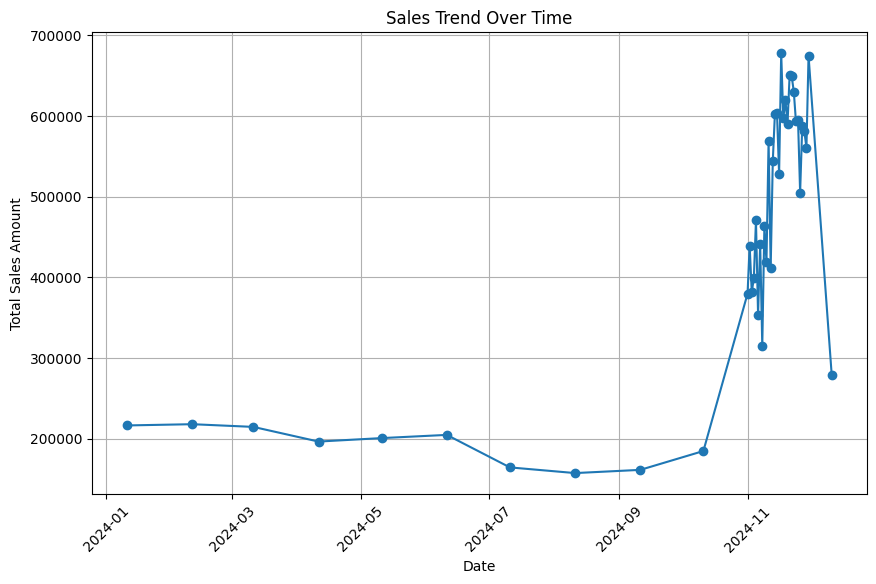

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(sales_by_date['Date'], sales_by_date['Sales Amount'], marker='o')
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45)
plt.grid()
plt.show()

Step 4.2: Sales distribution across different stores

# Sales Distribution Across Stores

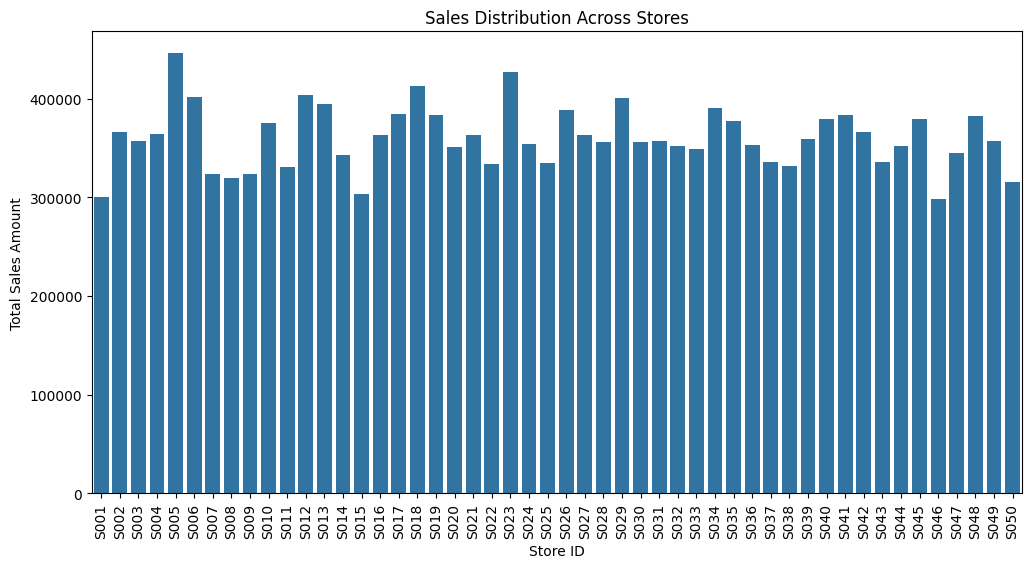

In [29]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Store ID', y='Sales Amount', data=sales_by_store)
plt.title("Sales Distribution Across Stores")
plt.xlabel("Store ID")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=90)
plt.show()


Step 4.3: Performance comparison of products

# Top 10 Products by Sales Amount

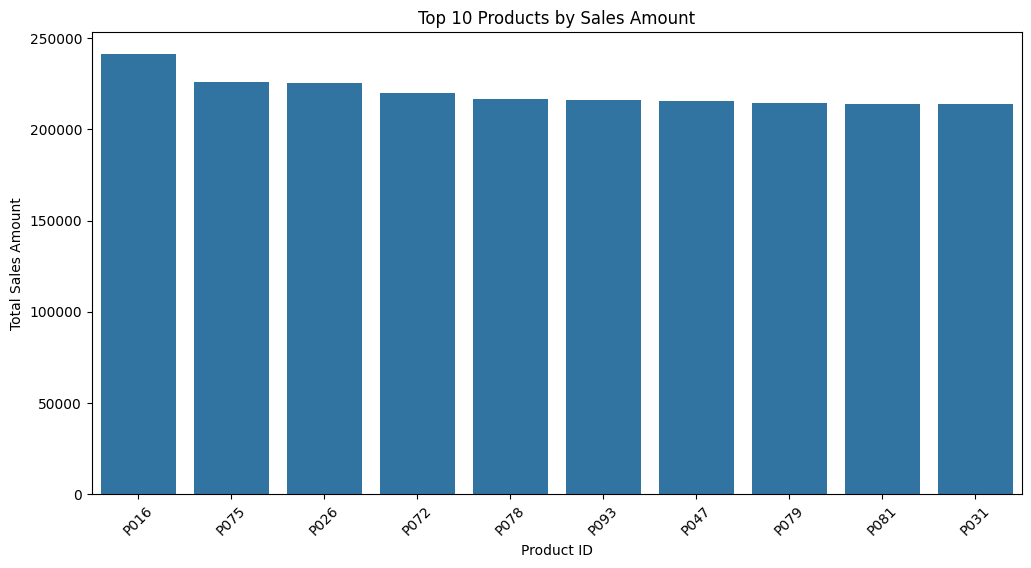

In [30]:
top_products = sales_by_product.sort_values(by='Sales Amount', ascending=False).head(10)  # Top 10 products
plt.figure(figsize=(12, 6))
sns.barplot(x='Product ID', y='Sales Amount', data=top_products)
plt.title("Top 10 Products by Sales Amount")
plt.xlabel("Product ID")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45)
plt.show()

# Sales by Customer Segment

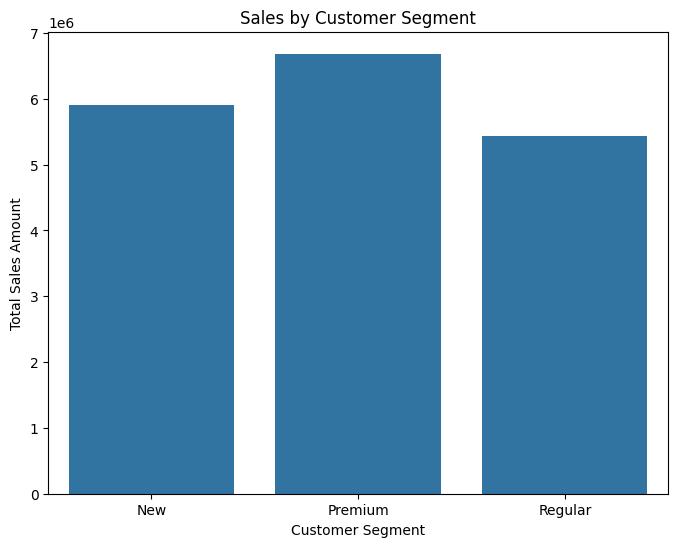

In [32]:
# Aggregate sales by Customer Segment
sales_by_segment = df.groupby('Customer Segment')['Sales Amount'].sum().reset_index()

# Plot
plt.figure(figsize=(8, 6))
sns.barplot(x='Customer Segment', y='Sales Amount', data=sales_by_segment)
plt.title("Sales by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Total Sales Amount")
plt.show()


# Units Sold vs. Sales Amount per Product

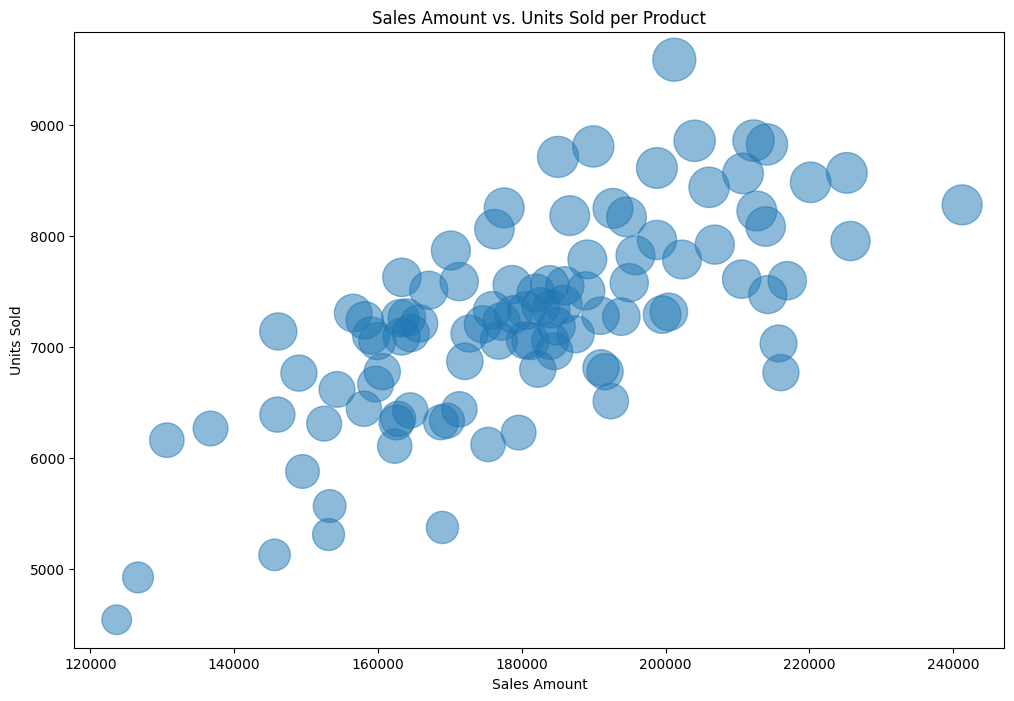

In [34]:
# Aggregate units sold and sales amount by product
product_sales_units = df.groupby('Product ID').agg({'Units Sold': 'sum', 'Sales Amount': 'sum'}).reset_index()

# Bubble plot
plt.figure(figsize=(12, 8))
plt.scatter(product_sales_units['Sales Amount'], product_sales_units['Units Sold'], 
            s=product_sales_units['Units Sold']*0.1, alpha=0.5)
plt.title("Sales Amount vs. Units Sold per Product")
plt.xlabel("Sales Amount")
plt.ylabel("Units Sold")
plt.show()


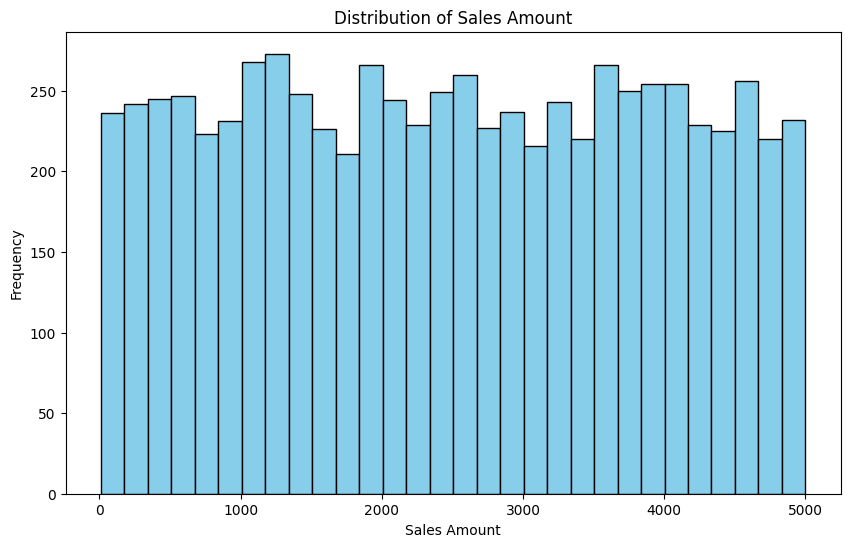

In [37]:
# Sales amount distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Sales Amount'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Sales Amount")
plt.xlabel("Sales Amount")
plt.ylabel("Frequency")
plt.show()


# Pair plot of key numerical variables

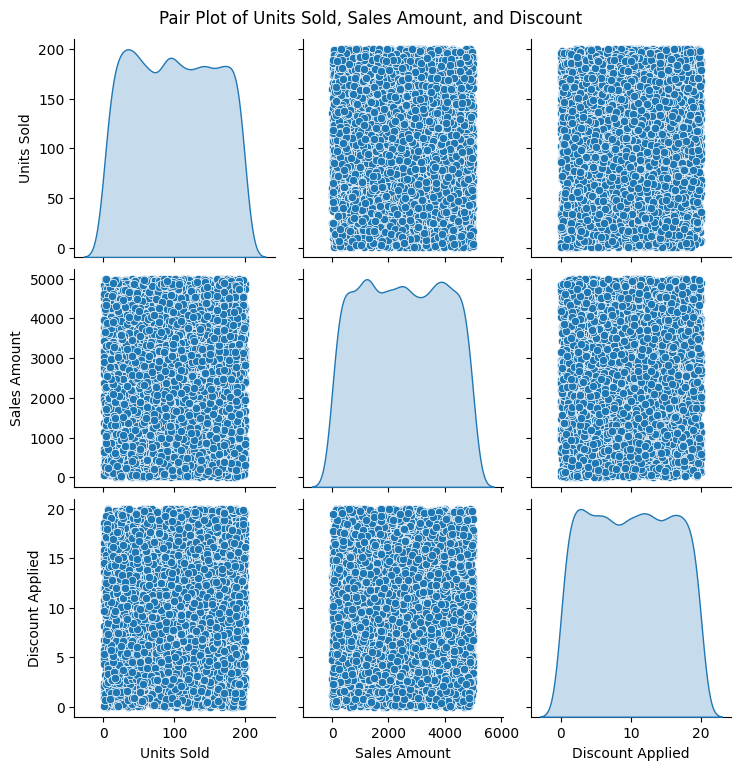

In [ ]:
sns.pairplot(df[['Units Sold', 'Sales Amount', 'Discount Applied']], diag_kind='kde')
plt.suptitle("Pair Plot of Units Sold, Sales Amount, and Discount", y=1.02)
plt.show()


# Aggregate sales by Customer Segment

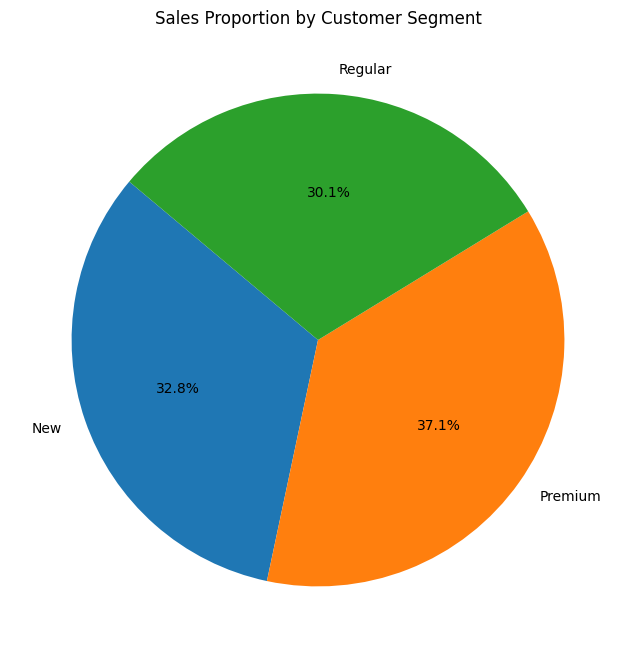

In [ ]:
sales_by_segment = df.groupby('Customer Segment')['Sales Amount'].sum()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(sales_by_segment, labels=sales_by_segment.index, autopct='%1.1f%%', startangle=140)
plt.title("Sales Proportion by Customer Segment")
plt.show()


Results

In [39]:
# Display results for analysis
print("Total Sales Per Product:\n", total_sales_per_product)
print("Average Sales Per Product:\n", average_sales_per_product)
print("Top Store by Sales:\n", top_store)
print("Discount Impact on Sales Amount:\n", discount_impact.head())

Total Sales Per Product:
    Product ID  Total Sales
0        P001    163274.25
1        P002    136709.40
2        P003    195802.79
3        P004    182637.46
4        P005    204034.37
..        ...          ...
95       P096    171291.09
96       P097    164493.17
97       P098    181206.75
98       P099    183945.25
99       P100    177544.94

[100 rows x 2 columns]
Average Sales Per Product:
    Product ID  Average Sales
0        P001    2236.633562
1        P002    2136.084375
2        P003    2542.893377
3        P004    2468.073784
4        P005    2518.942840
..        ...            ...
95       P096    2556.583433
96       P097    2419.017206
97       P098    2626.184783
98       P099    2452.603333
99       P100    2536.356286

[100 rows x 2 columns]
Top Store by Sales:
   Store ID  Sales Amount
4     S005     445850.38
Discount Impact on Sales Amount:
    Discount Applied  Sales Amount
0              0.00    708.680000
1              0.01   4027.070000
2              0.02